In [2]:
!pip install --quiet --upgrade google-genai google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 12.0 MB/s eta 0:00:00


In [3]:
from IPython.display import HTML, Markdown, display
from google import genai
import os

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/testcc-407815-73885e585a32.json'

In [5]:
client = genai.Client(
    vertexai=True,
    project="testcc-407815",
    location="us-central1",
)

In [6]:
model = "gemini-2.0-flash"

response = client.models.generate_content(
    model = model, contents="Dime quien eres"
)

display(Markdown(response.text))

Soy un modelo de lenguaje grande, entrenado por Google.


In [7]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch
google_search_tool = Tool(
    google_search = GoogleSearch()
)

response = client.models.generate_content(
    model=model,
    contents="Cuanto cuesta la accion de apple hoy?",
    config=GenerateContentConfig(
      tools=[google_search_tool],
      response_modalities=["TEXT"],
    )
)

In [8]:
display(Markdown(response.text))

El precio de las acciones de Apple (AAPL) hoy, 24 de noviembre de 2025, es de aproximadamente $271.35. Durante la jornada de hoy, el precio ha fluctuado entre un mínimo de $271.18 y un máximo de $271.86.

Otros datos relevantes sobre las acciones de Apple:

*   **Capitalización de mercado:** 4.01T
*   **Relación P/E:** 36.37
*   **Rendimiento de dividendos:** 37.6%
*   **Rango de 52 semanas:** $169.21 - $277.32


In [9]:
for chunk in client.models.generate_content_stream(
    model=model,
    contents="Haz un poema sobre gatos",
):
    display(Markdown(chunk.text))
    display(Markdown("----"))

**

----

O

----

da Felina**

Silencio líquido en la noche oscura,
un par

----

 de ámbares, faros en la bruma.
Un paso leve, casi

----

 sin sonido,
un cazador nocturno, bien crecido.

De seda el manto, suave y misterioso,
con manchas, rayas, un

----

 diseño hermoso.
Un ronroneo, vibración profunda,
que el alma calma, donde el amor abunda.

Juguete inquieto, pl

----

uma en el aire,
persigue sombras, sin mostrar desaire.
Un salto ágil, gracia desmedida,
aterriza siempre, sin hacer movida.

Independiente, dueño de su espacio,
con una

----

 mirada que traspasa el rastro.
Te observa atento, calculando el gesto,
un felino enigma, bello y modesto.

Acurrucado al sol, busca el calor,
un rey pequeño, sin mostrar

----

 temor.
Y cuando ronca, en sueño profundo,
la paz envuelve, todo el redondo.

Así es el gato, criatura divina,
un compañero fiel, que nos fascina.
Un lazo eterno, lleno de caricias,
maullidos suaves, que nos dan noticias.


----

In [13]:
from vertexai.preview.vision_models import ImageGenerationModel, GeneratedImage

imagen_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-002")

imagen_prompt = "Imagen de gatito sobre una nuve en un estilo cinematico"

response = imagen_model.generate_images(
    prompt=imagen_prompt,
)

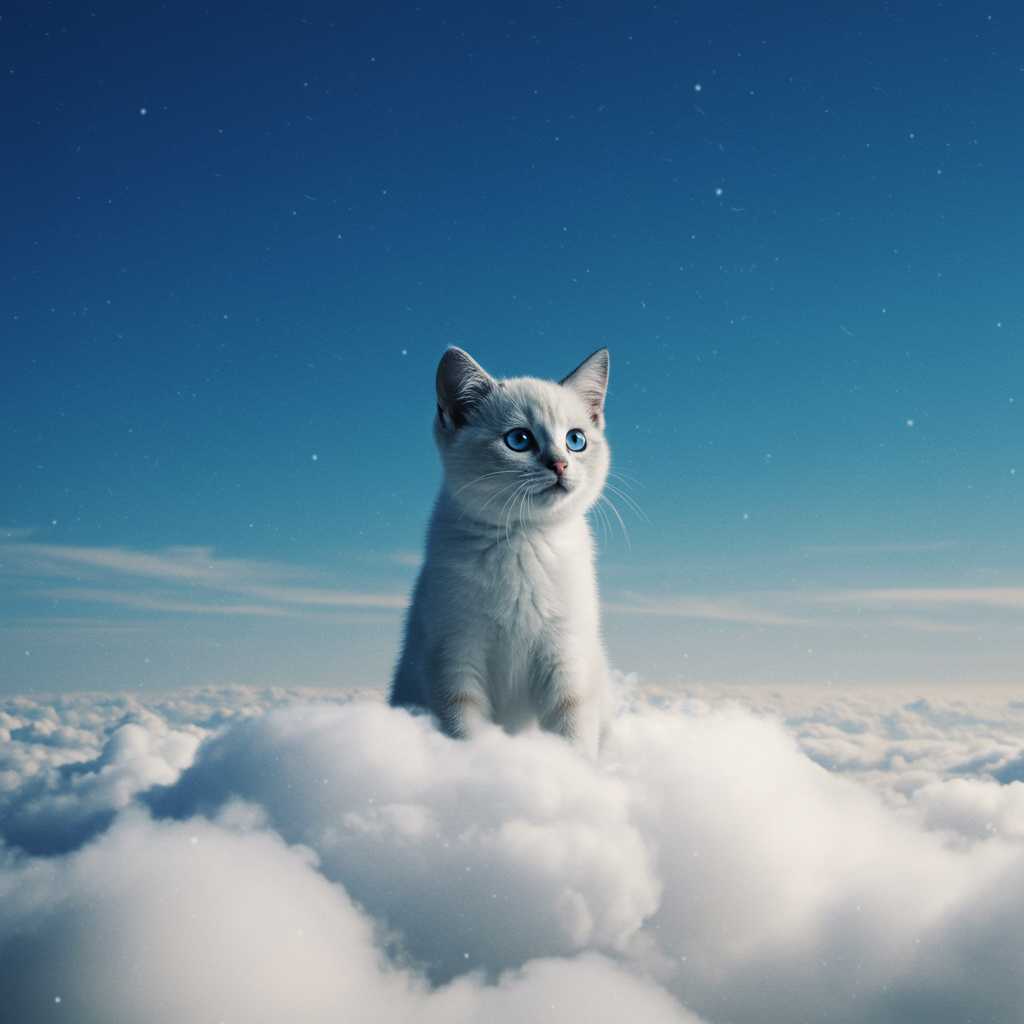

In [14]:
response.images[0].show()